# K-Nearest-Neigbors MNIST Classification

---

**NOTE:** This notebook will only cover a basic, non-optimized KNN. If you want an optimized KNN that can train on datasets with millions of points then check out my mnist classification with KNN notebook: https://github.com/ryanirl/ml-basics/blob/main/mnist_classification/KNN_mnist.ipynb

## Table of Contents
1. KNN Explained
3. Basic from Scratch Implimentation
4. Visualization
6. Final Words

<br />

---

## KNN Explained

K-Nearest-Neighbors (KNN) is a non-parametric supervised machine learning model that does all of it's computation at the testing stage. To add some intuition to big words, KNN remebers all of it's training data and stores it in memory. Then come testing time, it takes in new data and finds it's nearest neighbors in relation to the training data. There is then a voting process that takes place. For example consider the point (3, x) where we want to predict the value x. Now consider that it has 3 nearest (2, 3), (9, 3), and (4, 2). Then, x must equal 3 because there are two 3's and only one 2. This is the voting process. 

To find it's nearest neighbors KNN often uses Euclidean distance. But, it is not unheard to use other representations of distance such as the Manhattan or Minkowski distance.

<br />

<p>
    <img src="./img/KNN_example.png" width="50%">
</p>

In the above image, the point being classified would be of class A, because of it's nearest neighbors 2 are from class A and only 1 is from class B.

When chossing K, I prefer to keep it as an odd number so when voting takes place there are never any ties.

<br />

---

## Steps for KNN

1. Save all training data to memory that can be easily accesed come prediction time.
2. For each prediction point calculate it's nearest neighbor(s)
3. VOTE!

<br />

---

## Basic from Scratch Implimenation


In [1]:
# IMPORTS

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


In [2]:
# LOADING DATASET

# Heavily processed mnist data for a simple
# computationally cheap implimentation 
# SIZE (1797, 64)
mnist = load_digits()

# Splitting into training and testing
small_train_data, small_test_data, small_train_labels, small_test_labels = train_test_split(mnist.data, mnist.target, test_size=0.2)


In [3]:
# Basic Intuitive from Scratch Implimentation

# Accury and Speed not the best
# But more intuitive than either
# FaissKNeighbors or AnnoyKNN
class KNN:
    def __init__(self, K):
        self.K = K

    def _distance(self, x, z):
        return np.linalg.norm(x - z, axis = 1)

    def fit(self, X_train, y_train):
        """
        Because all computation is done during predict, nothing
        is needed here.

        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        self.X_test = X_test

        m, n = np.shape(X_test)
        predictions = np.zeros(m)

        for i in range(m):
            distance = self._distance(self.X_test[i], self.X_train)

            index = np.argsort(distance, axis = 0, kind="heapsort")[: self.K]

            predictions[i] = np.argmax(np.bincount(self.y_train[index]))

        return predictions
    
    def accuracy_score(self, predictions, actual):
        num_predictions = len(predictions)
        
        predictions[predictions != actual] = 0
        predictions[predictions == actual] = 1

        num_correct = np.sum(predictions)

        accuracy = float(num_correct) / num_predictions
        
        print("Number of Predictions: {} | Accurary: {}".format(num_predictions, accuracy))
    

Number of Predictions: 360 | Accurary: 0.9888888888888889


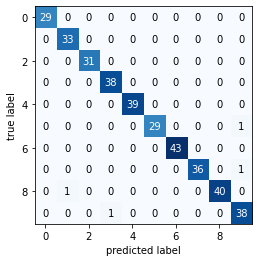

In [8]:
# TRAINING, TESTING, ACCURACY, & CONFUSION MATRIX

model = KNN(K = 3)
model.fit(small_train_data, small_train_labels)
predictions = model.predict(small_test_data)

# Computing confusion matrix
cm = confusion_matrix(y_target=small_test_labels, y_predicted=predictions, binary=False)

# Getting Accuracy
model.accuracy_score(predictions, small_test_labels)

# Plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)

## Analysis of Basic Implimentation

This version when working with heavily compiled mnist data works well. Though computing the L2 norm is extremely expensive and time consuming. To run this on the vanilla MNIST dataset would take days and the accuracy (for some unknown reason) is only about 80%.

Again, if you looking for an method that uses optimization and approximation of KNN, please take a look at my mnist classification with KNN notebook: https://github.com/ryanirl/ml-basics/blob/main/mnist_classification/KNN_mnist.ipynb

<br />

---

AUTHOR: RYAN PETERS
    
<br />
